In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
indir = "/mnt/CIL_integration/rff3_with_disc_factors/iter0-19/CAMEL_clipped/2020/unmasked_None/"

In [3]:
sccs = []

for disc in ['euler_ramsey', 'constant']:
    for recipe in ['adding_up', 'risk_aversion']:
        
            if disc == "constant":
                near_term = {
                    np.nan : (2.0, 0.0),
                }

            else:
                near_term = {
                    0.02 : (1.244459066, 0.00197263997),
                    0.03: (1.567899395, 0.00770271076),
                }
            
            for rate, eta_rho in near_term.items():
                df = xr.open_dataset(
                    f"{indir}/{recipe}_{disc}_eta{eta_rho[0]}_rho{eta_rho[1]}_uncollapsed_sccs.nc4"
                ).sel(weitzman_parameter='0.5')

                try:
                    df = df.sel(discrate=[0.02, 0.03]).to_dataframe()
                except:
                    df = df.to_dataframe()
                    df['discrate'] = rate
                    df = df.set_index('discrate', append=True)

                df['scenario'] = recipe

                sccs.append(df.reset_index())

In [4]:
data = pd.concat(sccs).reset_index()

/home/kschwarz/miniconda3/envs/dscim/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


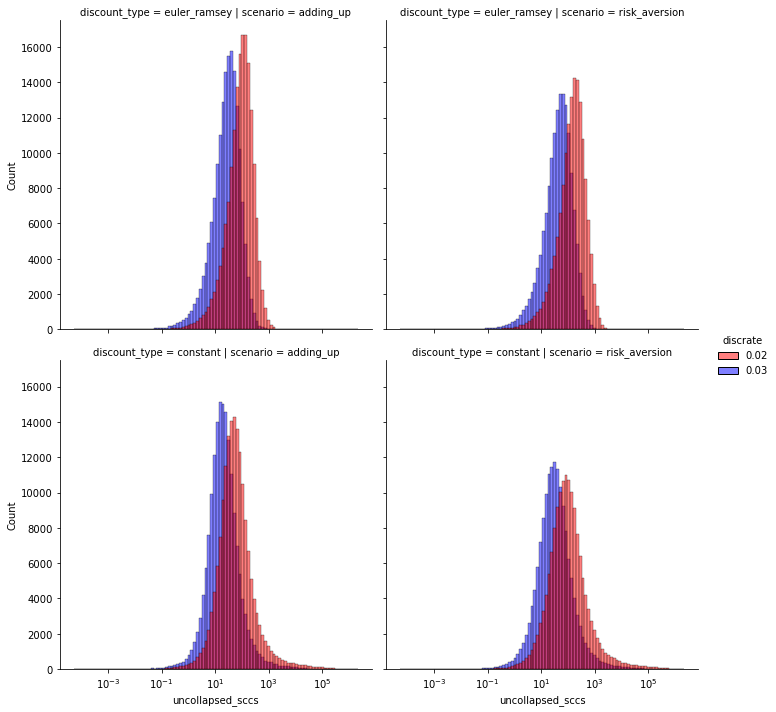

In [5]:
sns.displot(data=data,
            x='uncollapsed_sccs',
            hue='discrate',
            col='scenario',
            row='discount_type',
            palette=['red','blue'],
            log_scale=True,
            bins=100,
           )

plt.savefig('/mnt/CIL_integration/rff_diagnostics/v3/uncollapsed_scc_histograms.png', dpi=300, bbox_inches='tight')